In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit

In [3]:
angles = np.linspace(0, np.pi/4., 10)

In [4]:
print angles * 180. / np.pi

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.]


In [8]:
airmasses = 1./np.cos(angles)

In [11]:
print airmasses

[ 1.          1.00381984  1.01542661  1.03527618  1.06417777  1.10337792
  1.15470054  1.22077459  1.30540729  1.41421356]


In [9]:
harvard_data = np.linspace(6, 12, 10)

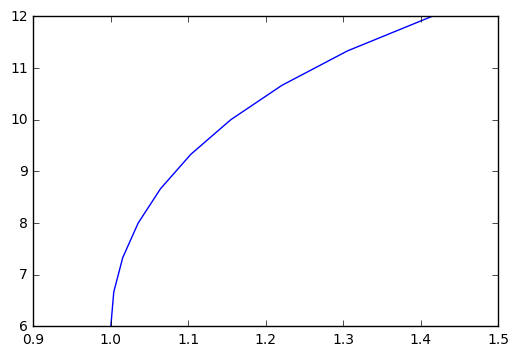

In [10]:
plot(airmasses, harvard_data)

In [24]:
I90 = 0.785
I45 = 0.81

In [41]:
yfake = np.array([I45, I90])
xfake = np.array([depth[0], depth[-1]])

In [42]:
popt = curve_fit(line, xfake, yfake)

In [19]:
depth = 1. / np.sin(angles_rad)

In [43]:
I_sim = line(depth, *popt[0])

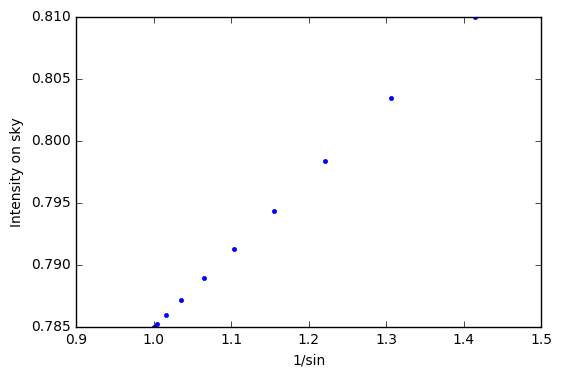

In [46]:
plot(depth, I_sim, '.')
ylabel('Intensity on sky')
xlabel('1/sin')

In [23]:
calibration_temp = np.array([77, 290])

In [25]:
calibration_data = np.array([0.94, 1.4])

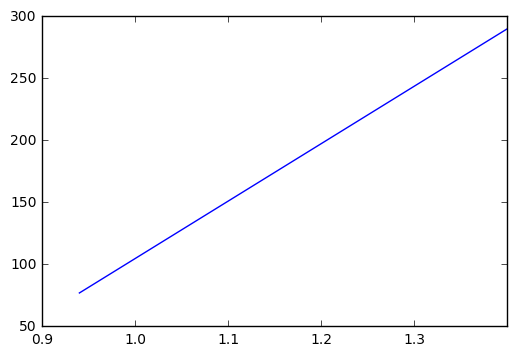

In [32]:
plot(calibration_data, calibration_temp)

In [33]:
def line(x, m, b):
    return m*x + b

In [34]:
popt = curve_fit(line, calibration_data, calibration_temp)

In [35]:
gain = popt[0][0]
trec = popt[0][1]

In [36]:
print gain
print trec

463.043478261
-358.260869565


In [47]:
temp_data = I_sim * gain + trec

(0, 1.5)

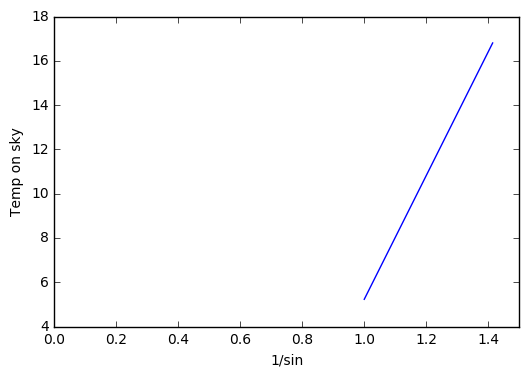

In [52]:
plot(depth, temp_data)
xlabel('1/sin')
ylabel('Temp on sky')
xlim([0, 1.5])

In [49]:
Tcmb = 0*gain + trec

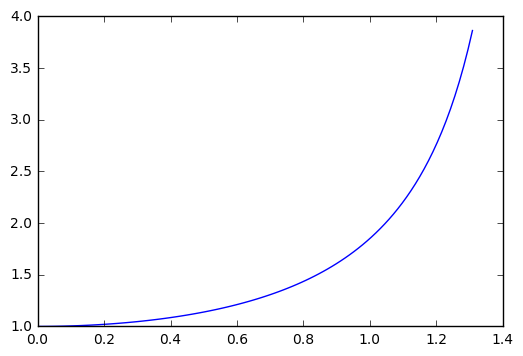

In [20]:
plot(angles, 1./np.cos(angles))

In [12]:
import glob


In [13]:
ls

BasicPlot+Analysis.ipynb       Untitled.ipynb
Jan27 testing1.ipynb           Untitled1.ipynb
Observation march 31.ipynb     sep20 pyvisa.ipynb
SkyDipAnalysis.ipynb           simulation march 31.ipynb
TemperatureCalibration2.ipynb  thermo readout.ipynb


In [18]:
ls


2017-03-31_15:40:16_Readout.txt  2017-03-31_16:00:21_Readout.txt
2017-03-31_15:44:11_Readout.txt  2017-03-31_16:01:26_Readout.txt
2017-03-31_15:51:25_Readout.txt  2017-03-31_16:02:34_Readout.txt
2017-03-31_15:58:51_Readout.txt  Old Data/


In [19]:
data = glob.glob('*.txt')

In [20]:
print data

['2017-03-31_15:40:16_Readout.txt', '2017-03-31_15:44:11_Readout.txt', '2017-03-31_15:51:25_Readout.txt', '2017-03-31_15:58:51_Readout.txt', '2017-03-31_16:00:21_Readout.txt', '2017-03-31_16:01:26_Readout.txt', '2017-03-31_16:02:34_Readout.txt', '2017-03-31_16:04:37_Readout.txt']


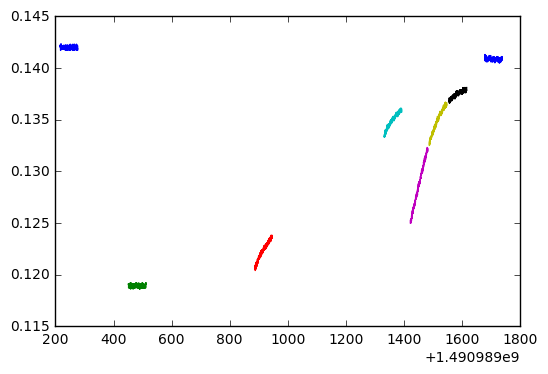

In [29]:
for x in data:
    y = np.loadtxt(x)
    plot (y[:,0],y[:,1])

In [60]:
y = np.loadtxt(data[-1])

In [61]:
print y[0,1]

0.1409


In [62]:
print y[0,2]

77.496


In [50]:
print np.mean(y[:,1])

0.118919191919


In [3]:
temps = np.array([302, 77.5, 80, 211, 300])

In [4]:
power = np.array([0.142, 0.119, 0.1207, 0.1334, 0.1409])

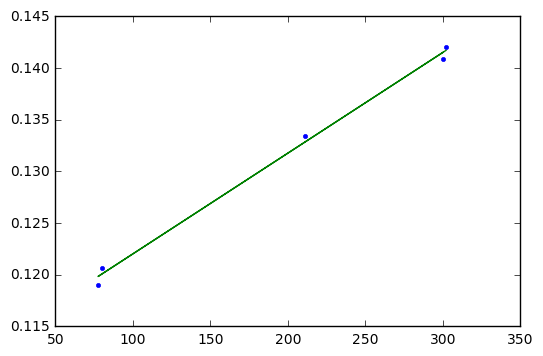

In [9]:
plot(temps, power, '.')
plot(temps, line(temps, *popt[0]))

In [6]:
def line(x, m, b):
    return m * x + b

In [7]:
popt = curve_fit(line, temps, power)

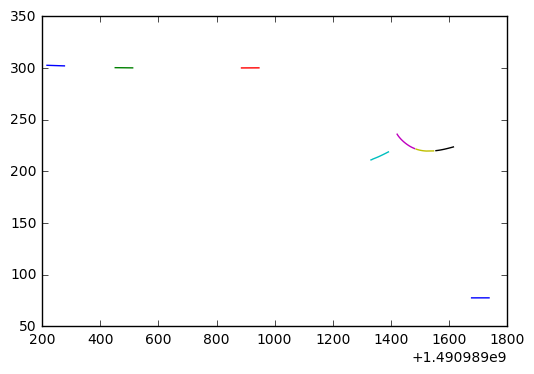

In [32]:
for x in data:
    y = np.loadtxt(x)
    plot (y[:,0],y[:,2])

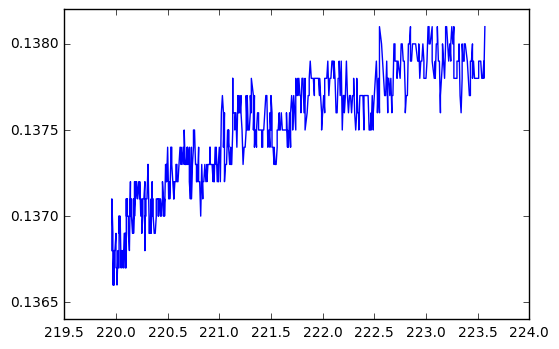

In [31]:
y = np.loadtxt(data[-2])
plot(y[:,2], y[:,1])

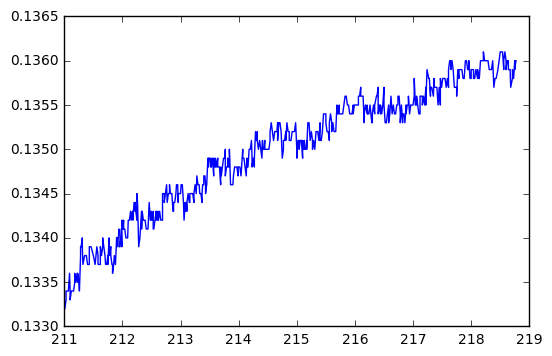

In [53]:
y = np.loadtxt(data[3])
plot(y[:,2], y[:,1])